In [2]:
import pandas as pd

from scipy import stats
from matplotlib import pyplot as mplt
import seaborn as sns

In [41]:
# configs
sns.set_palette('muted')
sns.set_style('ticks')
sns.set_context('notebook')

import warnings
warnings.filterwarnings('ignore')

In [45]:
metrics = ['expanded', 'branchingFactor', 'time']
column_names = ['size', 'boardID', 'algo', 'heuristic',  'expanded', 'branchingFactor', 'cost', 'time']
results_dir = '../../data/results/'

astar_f = results_dir + 'combined-astar.csv'

In [6]:
astar_df = pd.read_csv(astar_f)
astar_df.head()

,size,boardID,algo,heuristic,expanded,branchingFactor,cost,time
0,3x3,1.txt,astar,linearConflict,1,3.00,1,35
1,3x3,2.txt,astar,linearConflict,1,3.00,1,35
2,3x3,3.txt,astar,linearConflict,2,2.19,2,38
3,3x3,4.txt,astar,linearConflict,2,1.79,2,37
4,3x3,5.txt,astar,linearConflict,0,1.00,0,3


In [27]:
# used functions
def quantile_plot(x, **kwargs):
    qntls, xr = stats.probplot(x, fit=False)
    mplt.scatter(xr, qntls, **kwargs)
    
def dist_plots_vert(data, idx_attr, val_attr):
    val_ordering = data[idx_attr].value_counts().index
    g = sns.FacetGrid(data, row=idx_attr, row_order=val_ordering,
                      size=1.7, aspect=4)
    g.map(sns.distplot, val_attr, rug=True) #hist=False, rug=True
    
    return mplt.show()

def factor_plots_scatter(data, row_attr, col_attr, x_attr, y_attr):
    g_factor = sns.FacetGrid(data, row=row_attr, col=col_attr, margin_titles=True)
    g_factor.map(sns.regplot, x_attr, y_attr, color=".3", fit_reg=False, x_jitter=.1)
    return mplt.show()

def plot_pair_grid(data, color_attr):
    metrics = ['cost', 'expanded', 'branchingFactor', 'time']
    
    g_pair = sns.PairGrid(data, hue=color_attr, vars=metrics)
    g_pair = g_pair.map_diag(mplt.hist)
    g_pair = g_pair.map_offdiag(mplt.scatter)
    g_pair.add_legend()
    
    for ax in g_pair.axes.flat:
        [i.set_alpha(.75) for i in ax.collections]
        [i.set_alpha(.75) for i in ax.lines]
    
    sns.despine()
    return mplt.show()

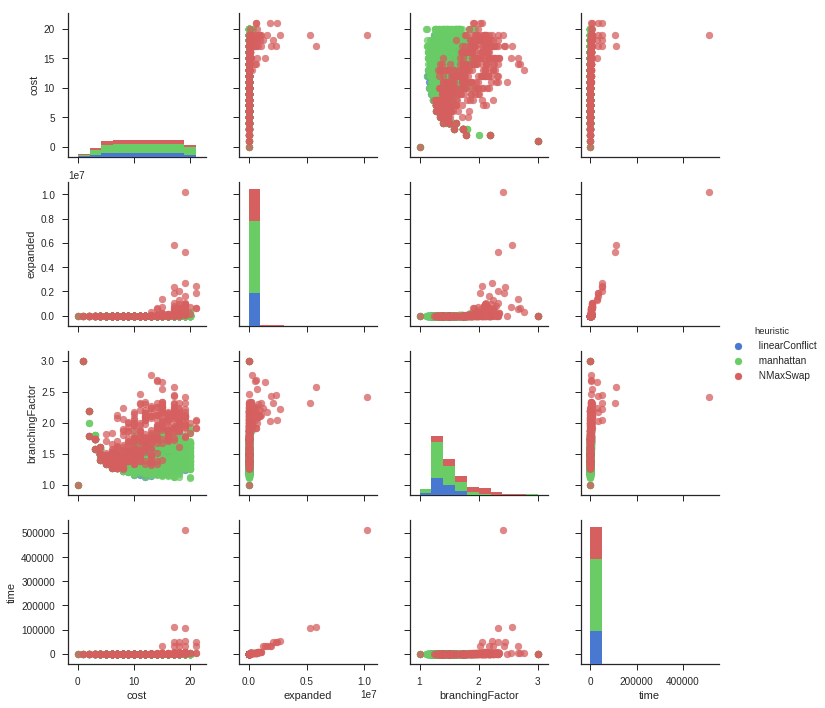

In [28]:
plot_pair_grid(astar_df, 'heuristic')

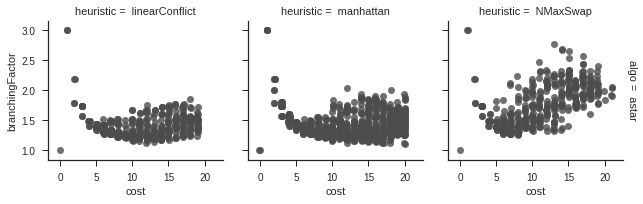

In [29]:
factor_plots_scatter(astar_df, 'algo', 'heuristic', 'cost', 'branchingFactor')

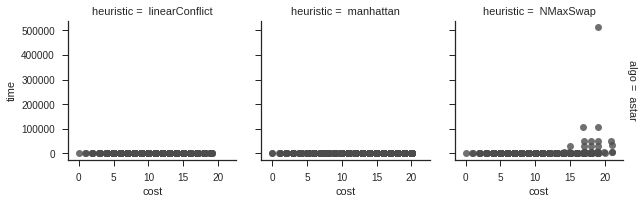

In [30]:
factor_plots_scatter(astar_df, 'algo', 'heuristic', 'cost', 'time')

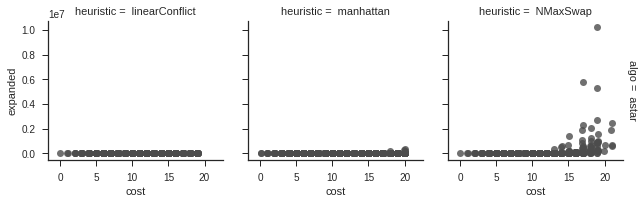

In [31]:
factor_plots_scatter(astar_df, 'algo', 'heuristic', 'cost', 'expanded')

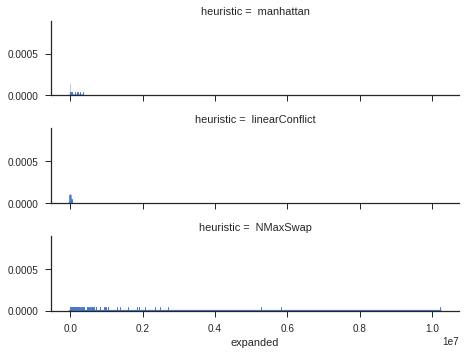

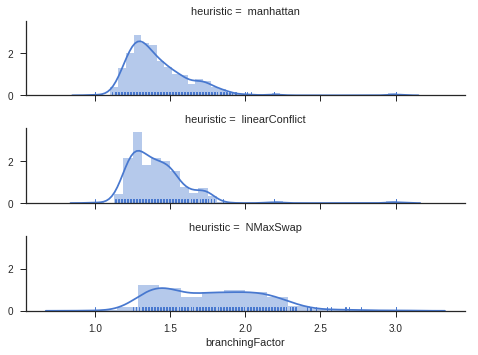

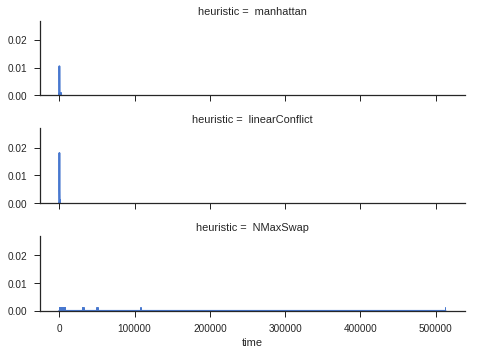

In [46]:
for metric in metrics:
    dist_plots_vert(astar_df, 'heuristic', metric)